In [1]:
%matplotlib inline

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import acf, pacf

# Time Series
## Live Demos

In [14]:
air_quality = pd.read_csv("data/AirQualityUCI.csv", sep = ";")

In [15]:
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [16]:
air_quality.shape

(9471, 17)

In [17]:
air_quality = air_quality.drop(["Unnamed: 15", "Unnamed: 16"], axis = 1)

In [18]:
air_quality.shape

(9471, 15)

In [26]:
air_quality = air_quality.drop(range(9357, len(air_quality)))

In [27]:
air_quality.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [34]:
for column in ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]:
    air_quality[column] = air_quality[column].str.replace(",", ".").astype("float")

In [35]:
air_quality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [36]:
air_quality.Date

0       10/03/2004
1       10/03/2004
2       10/03/2004
3       10/03/2004
4       10/03/2004
           ...    
9352    04/04/2005
9353    04/04/2005
9354    04/04/2005
9355    04/04/2005
9356    04/04/2005
Name: Date, Length: 9357, dtype: object

In [37]:
air_quality.Time

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object

In [43]:
time_formatted = air_quality.Time.str.replace(".", ":")

In [48]:
air_quality["DateTime"] = pd.to_datetime(air_quality.Date + " " + time_formatted)

In [50]:
air_quality = air_quality.drop(["Date", "Time"], axis = 1)

In [52]:
air_quality.dtypes

CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DateTime         datetime64[ns]
dtype: object

In [55]:
air_quality.DateTime.nunique() == len(air_quality)

True

In [57]:
air_quality.DateTime.is_unique

True

In [59]:
air_quality = air_quality.set_index("DateTime")

In [61]:
air_quality.index

DatetimeIndex(['2004-10-03 18:00:00', '2004-10-03 19:00:00',
               '2004-10-03 20:00:00', '2004-10-03 21:00:00',
               '2004-10-03 22:00:00', '2004-10-03 23:00:00',
               '2004-11-03 00:00:00', '2004-11-03 01:00:00',
               '2004-11-03 02:00:00', '2004-11-03 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=9357, freq=None)

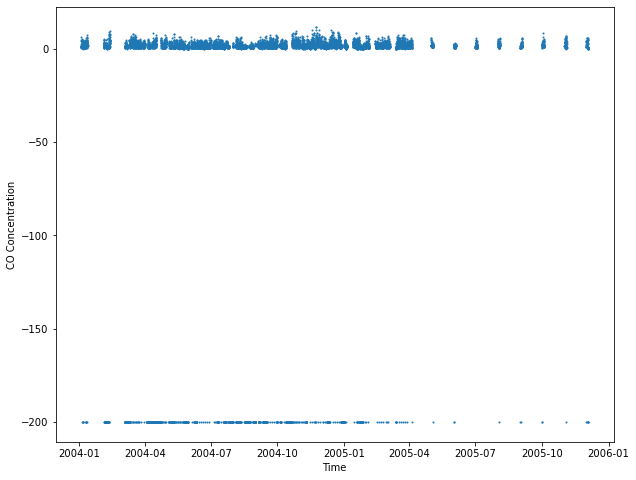

In [71]:
plt.figure(figsize = (10, 8))
plt.scatter(air_quality.index, air_quality["CO(GT)"], s = 1)
plt.xlabel("Time")
plt.ylabel("CO Concentration")
plt.show()

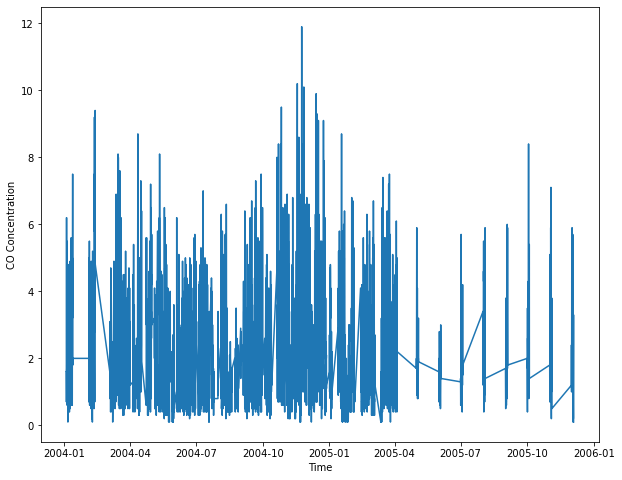

In [75]:
air_quality_valid = air_quality[air_quality["CO(GT)"] >= 0]
air_quality_valid = air_quality_valid.sort_index()

plt.figure(figsize = (10, 8))
plt.plot(air_quality_valid.index, air_quality_valid["CO(GT)"])
plt.xlabel("Time")
plt.ylabel("CO Concentration")
plt.show()

In [76]:
def plot_evolution(data, column_name = "CO(GT)", ylabel = "CO Concentration"):
    plt.figure(figsize = (10, 8))
    plt.plot(data.index, data[column_name])
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.show()

In [87]:
air_quality_jul2014 = air_quality_valid.loc["2004/07/01":"2004/08/01"]

In [88]:
air_quality_jul2014

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-07-04 00:00:00,0.9,948.0,93.0,4.0,710.0,56.0,1127.0,67.0,1352.0,575.0,15.7,45.9,0.8121
2004-07-04 01:00:00,0.7,889.0,49.0,2.3,603.0,35.0,1308.0,46.0,1271.0,455.0,15.6,44.9,0.7920
2004-07-04 02:00:00,0.4,830.0,30.0,1.4,538.0,21.0,1475.0,30.0,1214.0,392.0,15.6,44.4,0.7827
2004-07-04 03:00:00,0.3,801.0,30.0,0.7,464.0,-200.0,1749.0,-200.0,1154.0,340.0,16.1,42.4,0.7718
2004-07-04 04:00:00,0.3,804.0,30.0,0.7,468.0,12.0,1826.0,19.0,1166.0,320.0,15.7,45.4,0.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-07-31 19:00:00,1.6,1091.0,-200.0,10.2,987.0,71.0,737.0,104.0,1711.0,774.0,34.0,30.9,1.6158
2004-07-31 20:00:00,1.8,1080.0,-200.0,10.7,1004.0,90.0,724.0,114.0,1704.0,899.0,31.8,34.5,1.5911
2004-07-31 21:00:00,2.2,1128.0,-200.0,13.0,1082.0,95.0,675.0,105.0,1817.0,1066.0,30.1,37.7,1.5799


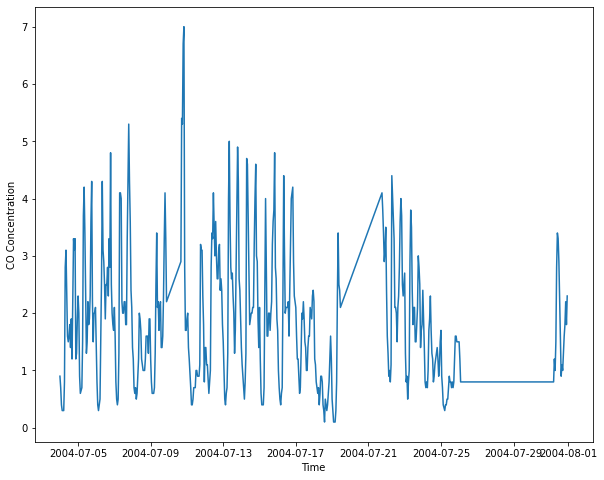

In [89]:
plot_evolution(air_quality_jul2014)

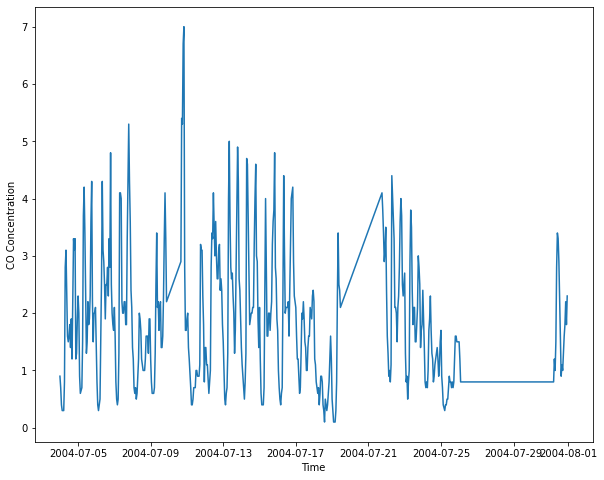

In [98]:
plot_evolution(air_quality_jul2014.interpolate("time"))

In [100]:
air_quality_valid = air_quality_valid.interpolate("time")

In [102]:
air_quality_valid.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),7674.0,2.152750,1.453252,0.1,1.10,1.8000,2.9000,11.9000
PT08.S1(CO),7674.0,1054.222700,341.261735,-200.0,927.00,1062.0000,1235.0000,2040.0000
NMHC(GT),7674.0,-150.867735,152.553382,-200.0,-200.00,-200.0000,-200.0000,1189.0000
C6H6(GT),7674.0,1.233385,43.276414,-200.0,4.10,8.1000,14.0000,63.7000
PT08.S2(NMHC),7674.0,897.865911,348.728250,-200.0,716.00,903.0000,1116.7500,2214.0000
NOx(GT),7674.0,230.809747,233.316418,-200.0,90.00,177.0000,326.0000,1479.0000
PT08.S3(NOx),7674.0,782.760099,326.251230,-200.0,628.00,782.0000,949.0000,2683.0000
NO2(GT),7674.0,97.746286,85.341664,-200.0,73.00,107.0000,141.0000,340.0000
PT08.S4(NO2),7674.0,1374.024498,478.335306,-200.0,1157.00,1425.0000,1659.0000,2775.0000
PT08.S5(O3),7674.0,990.038963,470.166864,-200.0,704.00,968.0000,1287.0000,2523.0000


In [106]:
exogenous_data_train, exogenous_data_test, exogenous_CO_train, exogenous_CO_test = train_test_split(
    air_quality_valid.drop("CO(GT)", axis = 1), air_quality_valid["CO(GT)"], train_size = 0.8)

In [109]:
fully_exogenous_model = LinearRegression()

In [110]:
fully_exogenous_model.fit(exogenous_data_train, exogenous_CO_train)

LinearRegression()

In [111]:
def show_results(estimator, data_train, data_test, target_train, target_test):
    print("Train score: {}".format(estimator.score(data_train, target_train)))
    print("Test score: {}".format(estimator.score(data_test, target_test)))    

In [112]:
show_results(fully_exogenous_model, exogenous_data_train, exogenous_data_test, exogenous_CO_train, exogenous_CO_test)

Train score: 0.883105098794688
Test score: 0.879524503426463


In [116]:
test_predictions = fully_exogenous_model.predict(exogenous_data_test)

In [144]:
def make_residual_plot(observed, estimated):
    plt.figure(figsize = (8, 5))
    plt.scatter(observed, observed - estimated, s = 3)
    plt.xlabel("Observed")
    plt.ylabel("Observed - Estimated")
    plt.show()

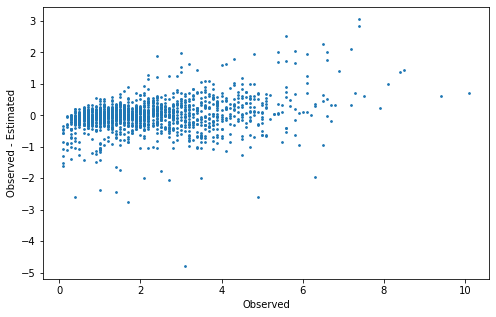

In [146]:
make_residual_plot(exogenous_CO_test, test_predictions)

In [143]:
(exogenous_CO_test - test_predictions).mean()

-0.00586306736200129

In [123]:
(exogenous_CO_test - test_predictions).std()

0.5083959352025371

In [149]:
air_quality_valid.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO(GT)_lag1
CO(GT),1.000000,0.474720,0.164898,0.077713,0.609351,0.763796,-0.571217,0.493603,0.384798,0.656862,-0.069274,-0.055723,-0.074336,0.830953
PT08.S1(CO),0.474720,1.000000,0.180270,0.860746,0.934752,0.340098,0.128427,0.246393,0.846221,0.893269,0.768043,0.768635,0.779903,0.379531
NMHC(GT),0.164898,0.180270,1.000000,0.044468,0.121478,-0.088761,0.057972,0.022321,0.190039,0.102274,0.009618,0.013675,0.018869,0.135050
C6H6(GT),0.077713,0.860746,0.044468,1.000000,0.780937,0.017259,0.535350,0.014065,0.779232,0.651219,0.973431,0.931969,0.985989,0.046780
PT08.S2(NMHC),0.609351,0.934752,0.121478,0.780937,1.000000,0.425192,-0.023942,0.309080,0.877318,0.909514,0.687611,0.617833,0.668739,0.485081
NOx(GT),0.763796,0.340098,-0.088761,0.017259,0.425192,1.000000,-0.528387,0.743365,0.102180,0.553014,-0.138108,-0.035199,-0.096912,0.645892
PT08.S3(NOx),-0.571217,0.128427,0.057972,0.535350,-0.023942,-0.528387,1.000000,-0.390100,0.162035,-0.173188,0.610688,0.581306,0.636965,-0.492118
NO2(GT),0.493603,0.246393,0.022321,0.014065,0.309080,0.743365,-0.390100,1.000000,0.065656,0.373899,-0.081753,-0.080902,-0.062630,0.431363
PT08.S4(NO2),0.384798,0.846221,0.190039,0.779232,0.877318,0.102180,0.162035,0.065656,1.000000,0.722214,0.762657,0.656205,0.701957,0.287418
PT08.S5(O3),0.656862,0.893269,0.102274,0.651219,0.909514,0.553014,-0.173188,0.373899,0.722214,1.000000,0.519217,0.549795,0.537091,0.569678


In [125]:
air_quality_valid[["CO(GT)"]]

,CO(GT)
DateTime,
2004-01-04 00:00:00,1.6
2004-01-04 01:00:00,1.2
2004-01-04 02:00:00,1.1
2004-01-04 03:00:00,0.9
2004-01-04 04:00:00,0.7
...,...
2005-12-03 19:00:00,0.8
2005-12-03 20:00:00,2.4
2005-12-03 21:00:00,3.3


In [197]:
air_quality_valid[["CO(GT)"]].diff()

,CO(GT)
DateTime,
2004-01-04 00:00:00,NaN
2004-01-04 01:00:00,-0.4
2004-01-04 02:00:00,-0.1
2004-01-04 03:00:00,-0.2
2004-01-04 04:00:00,-0.2
...,...
2005-12-03 19:00:00,-0.1
2005-12-03 20:00:00,1.6
2005-12-03 21:00:00,0.9


In [154]:
air_quality_autoreg = air_quality_valid[["CO(GT)"]].copy()
for lag in range(1, 6):
    air_quality_autoreg["CO_lag{}".format(lag)] = air_quality_autoreg["CO(GT)"].shift(lag)
air_quality_autoreg = air_quality_autoreg.dropna()
air_quality_autoreg

,CO(GT),CO_lag1,CO_lag2,CO_lag3,CO_lag4,CO_lag5
DateTime,,,,,,
2004-01-04 05:00:00,0.9,0.7,0.9,1.1,1.2,1.6
2004-01-04 06:00:00,1.7,0.9,0.7,0.9,1.1,1.2
2004-01-04 07:00:00,4.2,1.7,0.9,0.7,0.9,1.1
2004-01-04 08:00:00,6.2,4.2,1.7,0.9,0.7,0.9
2004-01-04 09:00:00,4.6,6.2,4.2,1.7,0.9,0.7
...,...,...,...,...,...,...
2005-12-03 19:00:00,0.8,0.9,0.7,0.4,0.2,0.5
2005-12-03 20:00:00,2.4,0.8,0.9,0.7,0.4,0.2
2005-12-03 21:00:00,3.3,2.4,0.8,0.9,0.7,0.4


In [137]:
ar_train, ar_test, ar_CO_train, ar_CO_test = train_test_split(
    air_quality_autoreg.drop("CO(GT)", axis = 1), air_quality_autoreg["CO(GT)"], train_size = 0.8)

In [138]:
linear_autoregression = LinearRegression()

In [141]:
linear_autoregression.fit(ar_train, ar_CO_train)

LinearRegression()

In [142]:
show_results(linear_autoregression, ar_train, ar_test, ar_CO_train, ar_CO_test)

Train score: 0.7225246286800846
Test score: 0.7115208347471141


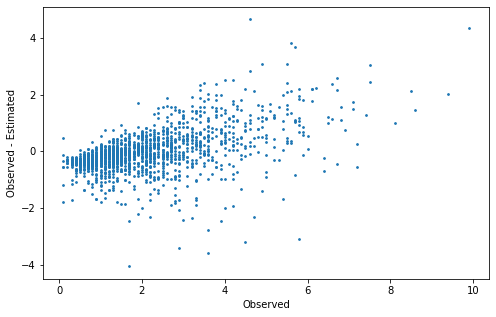

In [147]:
make_residual_plot(ar_CO_test, linear_autoregression.predict(ar_test))

In [160]:
air_quality_autoreg = air_quality_valid[["CO(GT)"]].copy()
for lag in range(1, 41):
    air_quality_autoreg["CO_lag{}".format(lag)] = air_quality_autoreg["CO(GT)"].shift(lag)
air_quality_autoreg = air_quality_autoreg.dropna()
air_quality_autoreg

,CO(GT),CO_lag1,CO_lag2,CO_lag3,CO_lag4,CO_lag5,CO_lag6,CO_lag7,CO_lag8,CO_lag9,...,CO_lag31,CO_lag32,CO_lag33,CO_lag34,CO_lag35,CO_lag36,CO_lag37,CO_lag38,CO_lag39,CO_lag40
DateTime,,,,,,,,,,,,,,,,,,,,,
2004-01-05 17:00:00,1.8,2.0,1.8,1.3,1.3,2.0,1.9,2.1,1.8,1.5,...,4.6,6.2,4.2,1.7,0.9,0.7,0.9,1.1,1.2,1.6
2004-01-05 18:00:00,2.4,1.8,2.0,1.8,1.3,1.3,2.0,1.9,2.1,1.8,...,2.8,4.6,6.2,4.2,1.7,0.9,0.7,0.9,1.1,1.2
2004-01-05 19:00:00,4.0,2.4,1.8,2.0,1.8,1.3,1.3,2.0,1.9,2.1,...,1.6,2.8,4.6,6.2,4.2,1.7,0.9,0.7,0.9,1.1
2004-01-05 20:00:00,2.8,4.0,2.4,1.8,2.0,1.8,1.3,1.3,2.0,1.9,...,1.7,1.6,2.8,4.6,6.2,4.2,1.7,0.9,0.7,0.9
2004-01-05 21:00:00,2.0,2.8,4.0,2.4,1.8,2.0,1.8,1.3,1.3,2.0,...,1.7,1.7,1.6,2.8,4.6,6.2,4.2,1.7,0.9,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-03 19:00:00,0.8,0.9,0.7,0.4,0.2,0.5,0.3,0.6,0.7,0.6,...,2.3,1.6,1.4,1.4,2.5,3.6,4.3,4.2,2.5,3.6
2005-12-03 20:00:00,2.4,0.8,0.9,0.7,0.4,0.2,0.5,0.3,0.6,0.7,...,2.4,2.3,1.6,1.4,1.4,2.5,3.6,4.3,4.2,2.5
2005-12-03 21:00:00,3.3,2.4,0.8,0.9,0.7,0.4,0.2,0.5,0.3,0.6,...,2.7,2.4,2.3,1.6,1.4,1.4,2.5,3.6,4.3,4.2


In [161]:
ar_train, ar_test, ar_CO_train, ar_CO_test = train_test_split(
    air_quality_autoreg.drop("CO(GT)", axis = 1), air_quality_autoreg["CO(GT)"], train_size = 0.8)
linear_autoregression = LinearRegression()
linear_autoregression.fit(ar_train, ar_CO_train)
show_results(linear_autoregression, ar_train, ar_test, ar_CO_train, ar_CO_test)

Train score: 0.7532804693273473
Test score: 0.75347459015439


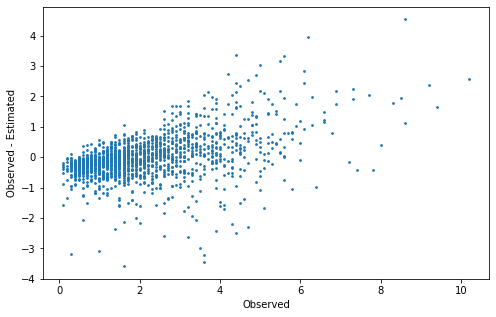

In [163]:
make_residual_plot(ar_CO_test, linear_autoregression.predict(ar_test))

In [166]:
(air_quality_valid["CO(GT)"]).corr(air_quality_valid["CO(GT)"].shift(1)) # autocorrelation

0.8309534628014088

In [167]:
(air_quality_valid["CO(GT)"]).corr(air_quality_valid["CO(GT)"].shift(2)) # autocorrelation

0.5956844218645878

In [184]:
acf_results = acf(air_quality_valid["CO(GT)"], nlags = 200, fft = True)

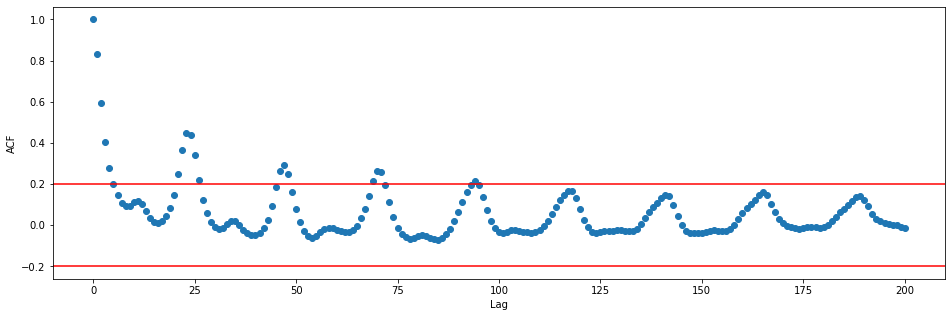

In [190]:
plt.figure(figsize = (16, 5))

plt.scatter(range(len(acf_results)), acf_results)

plt.axhline(0.2, c = "red")
plt.axhline(-0.2, c = "red")

plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

In [193]:
pacf_results = pacf(air_quality_valid["CO(GT)"], nlags = 200)

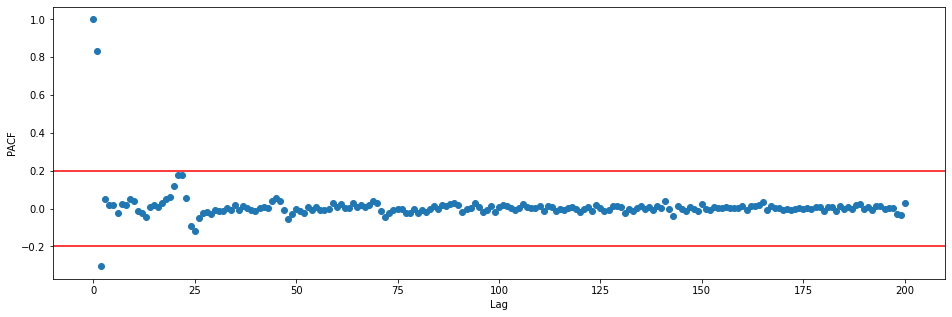

In [195]:
plt.figure(figsize = (16, 5))

plt.scatter(range(len(pacf_results)), pacf_results)

plt.axhline(0.2, c = "red")
plt.axhline(-0.2, c = "red")

plt.xlabel("Lag")
plt.ylabel("PACF")
plt.show()

In [198]:
air_quality.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [213]:
air_quality_autoreg_exogenous = air_quality_valid.copy()
for variable in ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "T", "RH", "AH"]:
    for lag in [1, 2, 3, 4]:
        air_quality_autoreg_exogenous["{}_lag{}".format(variable, lag)] = air_quality_valid[variable].shift(lag)
    for difference in [1]:
        air_quality_autoreg_exogenous["{}_diff{}".format(variable, difference)] = air_quality_valid[variable].diff(difference)
air_quality_autoreg_exogenous = air_quality_autoreg_exogenous.dropna()
air_quality_autoreg_exogenous

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,RH_lag1,RH_lag2,RH_lag3,RH_lag4,RH_diff1,AH_lag1,AH_lag2,AH_lag3,AH_lag4,AH_diff1
DateTime,,,,,,,,,,,,,,,,,,,,,
2004-01-04 04:00:00,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,...,73.1,67.2,63.9,61.6,-6.5,0.8394,0.8630,0.8652,0.8593,-0.0095
2004-01-04 05:00:00,0.9,996.0,45.0,2.9,648.0,64.0,1176.0,50.0,1340.0,852.0,...,66.6,73.1,67.2,63.9,-2.9,0.8299,0.8394,0.8630,0.8652,0.0026
2004-01-04 06:00:00,1.7,1154.0,134.0,7.4,876.0,153.0,1002.0,67.0,1561.0,987.0,...,63.7,66.6,73.1,67.2,5.1,0.8325,0.8299,0.8394,0.8630,-0.0082
2004-01-04 07:00:00,4.2,1510.0,505.0,19.8,1291.0,342.0,675.0,94.0,1949.0,1435.0,...,68.8,63.7,66.6,73.1,0.8,0.8243,0.8325,0.8299,0.8394,0.0030
2004-01-04 08:00:00,6.2,1722.0,1042.0,31.9,1595.0,378.0,539.0,119.0,2439.0,1798.0,...,69.6,68.8,63.7,66.6,-8.7,0.8273,0.8243,0.8325,0.8299,0.0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-03 19:00:00,0.8,1177.0,-200.0,7.5,878.0,289.0,641.0,152.0,1224.0,844.0,...,40.0,34.1,35.5,35.0,7.8,0.7018,0.6775,0.7065,0.7014,0.0564
2005-12-03 20:00:00,2.4,1383.0,-200.0,14.1,1119.0,550.0,522.0,201.0,1415.0,1310.0,...,47.8,40.0,34.1,35.5,3.6,0.7582,0.7018,0.6775,0.7065,0.0178
2005-12-03 21:00:00,3.3,1363.0,-200.0,12.4,1064.0,679.0,536.0,221.0,1350.0,1353.0,...,51.4,47.8,40.0,34.1,4.7,0.7760,0.7582,0.7018,0.6775,0.0072


In [214]:
ar_train, ar_test, ar_CO_train, ar_CO_test = train_test_split(
    air_quality_autoreg_exogenous.drop("CO(GT)", axis = 1), air_quality_autoreg_exogenous["CO(GT)"], train_size = 0.8)
linear_autoregression_exogenous = LinearRegression()
linear_autoregression_exogenous.fit(ar_train, ar_CO_train)
show_results(linear_autoregression_exogenous, ar_train, ar_test, ar_CO_train, ar_CO_test)

Train score: 1.0
Test score: 1.0


In [216]:
air_quality_valid[:-1000]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO(GT)_lag1
DateTime,,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143.0,106.0,6.3,825.0,96.0,986.0,86.0,1477.0,978.0,12.0,61.6,0.8593,NaN
2004-01-04 01:00:00,1.2,1044.0,100.0,5.1,770.0,85.0,1031.0,70.0,1425.0,944.0,11.5,63.9,0.8652,1.6
2004-01-04 02:00:00,1.1,1034.0,71.0,4.1,716.0,50.0,1085.0,55.0,1405.0,891.0,10.7,67.2,0.8630,1.2
2004-01-04 03:00:00,0.9,956.0,72.0,4.0,713.0,-200.0,1099.0,-200.0,1422.0,849.0,9.0,73.1,0.8394,1.1
2004-01-04 04:00:00,0.7,909.0,44.0,2.4,615.0,57.0,1237.0,49.0,1322.0,790.0,10.2,66.6,0.8299,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-16 21:00:00,4.9,1545.0,-200.0,23.5,1390.0,582.0,423.0,229.0,1676.0,1915.0,16.9,42.9,0.8222,4.4
2005-03-16 22:00:00,2.9,1354.0,-200.0,13.3,1094.0,407.0,517.0,194.0,1357.0,1705.0,15.5,45.0,0.7895,4.9
2005-03-16 23:00:00,2.1,1301.0,-200.0,10.5,998.0,327.0,553.0,171.0,1283.0,1610.0,14.3,49.6,0.8049,2.9


In [218]:
fremont = pd.read_csv("data/Fremont_Bridge_Bicycle_Counter.csv")

In [220]:
fremont.Date = pd.to_datetime(fremont.Date)

In [221]:
fremont.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,13.0,4.0,9.0
1,2012-10-03 01:00:00,10.0,4.0,6.0
2,2012-10-03 02:00:00,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.0,2.0,3.0
4,2012-10-03 04:00:00,7.0,6.0,1.0


In [222]:
fremont.shape

(136334, 4)

In [223]:
fremont.dtypes

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
dtype: object

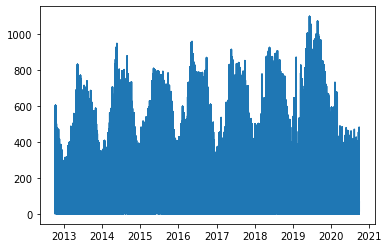

In [226]:
plt.plot(fremont.Date, fremont["Fremont Bridge Total"])
plt.show()

In [229]:
fremont = fremont.set_index("Date")

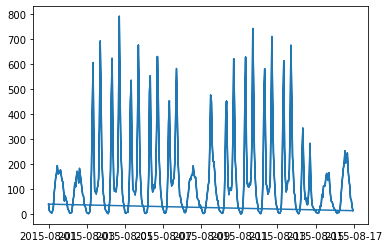

In [234]:
plt.plot(fremont["2015/08/01":"2015/08/16"].index, fremont["2015/08/01":"2015/08/16"]["Fremont Bridge Total"])